In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Cost Function
### $$ f(t_1, t_2) = \sqrt{t_1^2 + t_2^2} $$

In [1]:
def f(t1, t2,t3):
    return t1**2 +t2**2 + t3**3

## Partial Derivative with Respect to \( t_1 \)
### $$ \frac{\partial f}{\partial t_1} = \frac{t_1}{\sqrt{t_1^2 + t_2^2 + \epsilon}} $$

where \( \epsilon \) is a small value added to avoid division by zero.

In [3]:
def pdfx(t1, t2, t3):
    return 2*t1


## Partial Derivative with Respect to \( t_2 \)
### $$ \frac{\partial f}{\partial t_2} = \frac{t_2}{\sqrt{t_1^2 + t_2^2 + \epsilon}} $$

where \( \epsilon \) is a small value added to avoid division by zero.


In [4]:
def pdfy(t1, t2, t3):
    return 2*t2


In [5]:
def pdfz(t1, t2, t3):
    return 2*t3

In [30]:
t1 = np.linspace(-1, 1, 100)
t2 = np.linspace(-1, 1, 100)
t3 = np.linspace(-1, 1, 100)
t3 = 0

t1, t2 = np.meshgrid(t1, t2)
Z = f(t1,t2,t3)

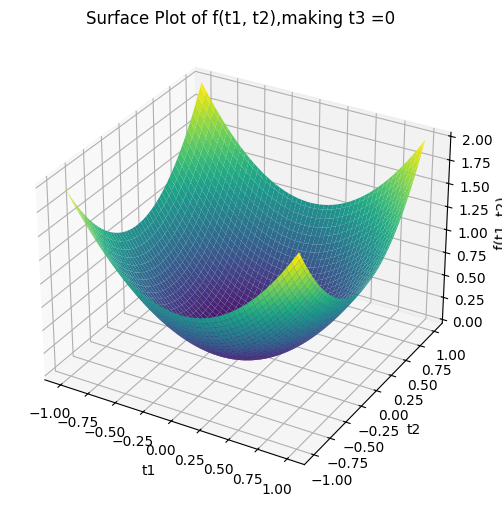

In [35]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(t1, t2, Z, cmap='viridis')
ax.set_xlabel('t1')
ax.set_ylabel('t2')
ax.set_zlabel('f(t1, t2)')
ax.set_title('Surface Plot of f(t1, t2),making t3 =0')
plt.show()

what if i make t1 as zero , will the graph be same??

In [36]:
t1 = np.linspace(-1, 1, 100)
t2 = np.linspace(-1, 1, 100)
t3 = np.linspace(-1, 1, 100)
t1 = 0

t2, t3 = np.meshgrid(t2, t3)
Z = f(t1,t2,t3)

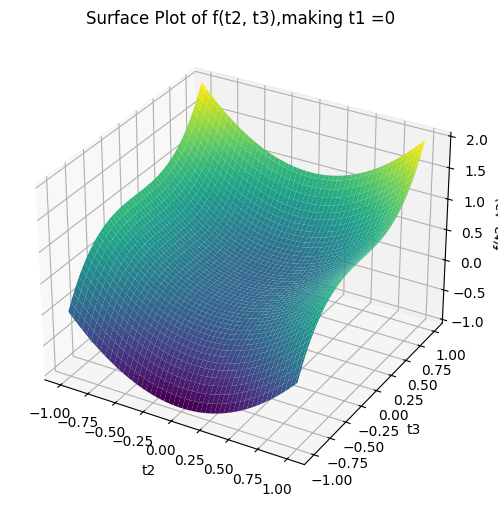

In [37]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(t2, t3, Z, cmap='viridis')
ax.set_xlabel('t2')
ax.set_ylabel('t3')
ax.set_zlabel('f(t2, t3)')
ax.set_title('Surface Plot of f(t2, t3),making t1 =0')
plt.show()

ohoo so the graph has changed

In [63]:
def gradient_descent(learning_rate, max_iter=5000, precision=1e-6,initial_t1=1.8,initial_t2=1.5,initial_t3 =0.6,print_steps= False , steps = 0):
    t1_old, t2_old, t3_old = initial_t1,initial_t2,initial_t3
    t1_list = []
    t2_list =[]
    t3_list =[]
    cost_list = []  

    
    for i in range(1, max_iter + 1):
        t1_new = t1_old - learning_rate * pdfx(t1_old, t2_old,t3_old)
        t2_new = t2_old - learning_rate * pdfy(t1_old, t2_old,t3_old)
        t3_new = t3_old - learning_rate * pdfz(t1_old, t2_old,t3_old)

        cost = f(t1_new, t2_new,t3_new)  # Compute cost
        cost_list.append(cost)  

        t1_list.append(t1_old)
        t2_list.append(t2_old)
        t3_list.append(t3_old)

        
        if abs(f(t1_new, t2_new,t3_new) - f(t1_old, t2_old,t3_old)) < precision:
            break
        
        t1_old, t2_old , t3_old = t1_new, t2_new,t3_new
        if print_steps and i < steps+1:
            print("i=",i ,"pdfx=",pdfx(t1_old,t2_old,t3_old),"pdfy=",pdfy(t1_old,t2_old,t3_old),"pdfz=",pdfz(t1_old,t2_old,t3_old),"alpha*pdfx=",learning_rate*pdfx(t1_old,t2_old,t3_old),"alpha*pdfy=",learning_rate*pdfy(t1_old,t2_old,t3_old),"alpha*pdfz=",learning_rate*pdfz(t1_old,t2_old,t3_old),"t1_list=",t1_list,"t2_list=",t2_list,"t3_list=",t3_list),
    
    return cost_list, i,t1_list, t2_list,t3_list


i= 1 pdfx= 3.456 pdfy= 2.88 pdfz= 1.152 alpha*pdfx= 0.06912 alpha*pdfy= 0.0576 alpha*pdfz= 0.023039999999999998 t1_list= [1.8] t2_list= [1.5] t3_list= [0.6]
i= 2 pdfx= 3.31776 pdfy= 2.7647999999999997 pdfz= 1.10592 alpha*pdfx= 0.0663552 alpha*pdfy= 0.055296 alpha*pdfz= 0.0221184 t1_list= [1.8, 1.728] t2_list= [1.5, 1.44] t3_list= [0.6, 0.576]
i= 3 pdfx= 3.1850495999999997 pdfy= 2.6542079999999997 pdfz= 1.0616832 alpha*pdfx= 0.063700992 alpha*pdfy= 0.05308415999999999 alpha*pdfz= 0.021233664000000003 t1_list= [1.8, 1.728, 1.65888] t2_list= [1.5, 1.44, 1.3823999999999999] t3_list= [0.6, 0.576, 0.55296]


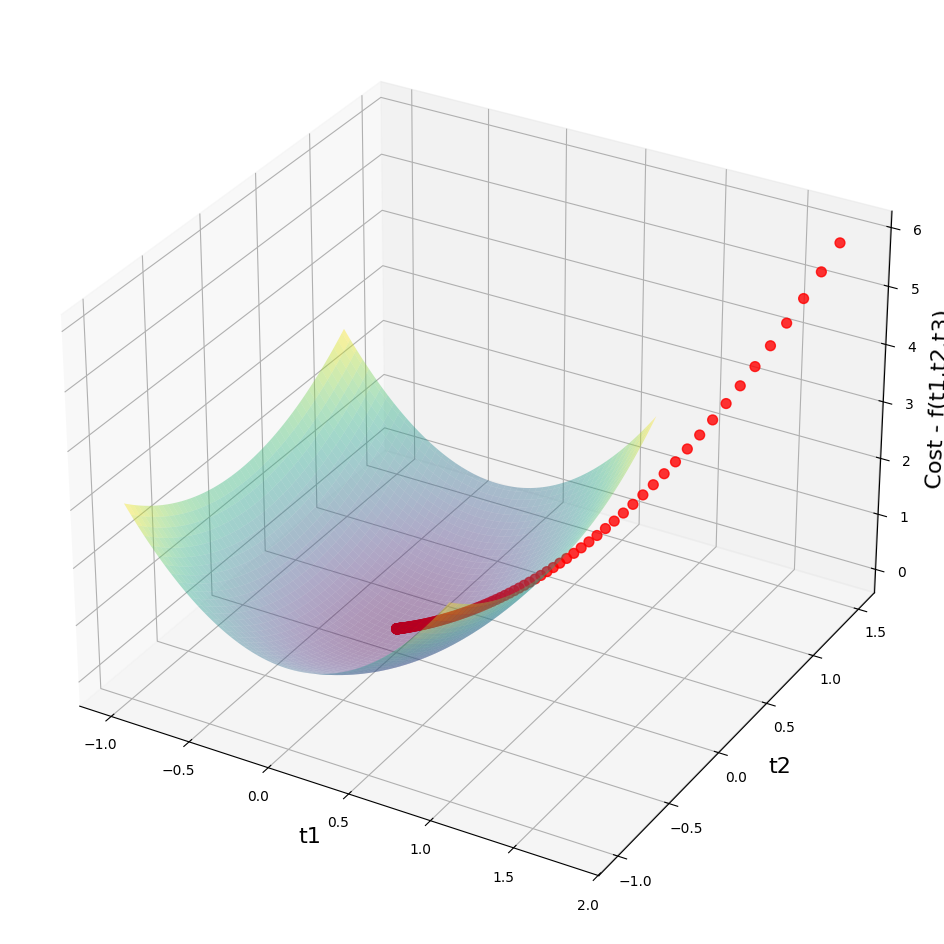

In [64]:
learning_rate = 0.02
_,_,t1_list, t2_list,t3_list = gradient_descent(learning_rate,print_steps=True,steps=3)

# Plotting the 3D graph
fig = plt.figure(figsize=[16, 12])
ax = plt.axes(projection='3d')
ax.set_xlabel('t1', fontsize=16)
ax.set_ylabel('t2', fontsize=16)
ax.set_zlabel('Cost - f(t1,t2,t3)', fontsize=16)

t1 = np.linspace(-1, 1, 100)
t2 = np.linspace(-1, 1, 100)
t3 = np.linspace(-1, 1, 100)
t1,t2 = np.meshgrid(t1, t2)
Z = f(t1,t2,t3)
ax.plot_surface(t1,t2, Z, alpha=0.4, cmap='viridis')


t1_list = np.array(t1_list)
t2_list = np.array(t2_list)
ax.scatter(t1_list, t2_list, f(np.array(t1_list), np.array(t2_list),np.array(t3_list)), alpha=0.8, s=50, color='red')

plt.show()


Looks converged 